In [4]:
import torch
import torchvision
from torch.autograd import Variable
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import cv2
import matplotlib.pyplot as plt

In [54]:
data = [0, 1, 10]
new_data = [val if len(str(val))==2 else '0' + str(val) for val in data]
new_data

['00', '01', 10]

In [52]:
train_dataset = datasets.MNIST(root='data/', train=True,
                               transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='data/test', train=False,
                              transform=transforms.ToTensor(), download=True)


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [40]:
train_loader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)

[6]


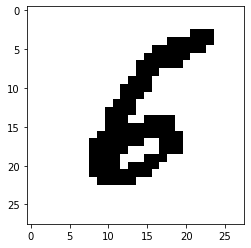

True

In [79]:
images, lables = next(iter(train_loader))
img = torchvision.utils.make_grid(images, nrow=2)
img = img.numpy().transpose(1, 2, 0)
img = img*255
img = img.astype('int')
print(lables.numpy())
img[img>125] = 300
img[img<125] = 255
img[img==300] = 0
plt.imshow(img)
plt.show()

cv2.imwrite('tt.jpg', img*255)

In [111]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

	
device = torch.device("cuda")
model = Net().to(device)
model.load_state_dict(torch.load('mnist_cnn.pt'))

<All keys matched successfully>

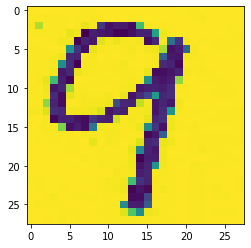

torch.Size([1, 1, 28, 28])

In [146]:
im = cv2.imread('data/test/5.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = cv2.resize(im, (28, 28))
# print(im)
# im[im >=250] = 300
# im[im<250] = 255
# im[im == 300] = 0

plt.imshow(im)
plt.show()
# cv2.imwrite('tp.jpg', im)
im = [im]
im = torch.tensor([im]) / 255
im.shape
# print(im.shape)
# im = im.to(device)

In [147]:

model.eval()
with torch.no_grad():
	data = im.to(device)
	output = model(data)
	# sum up batch loss
	# get the index of the max log-probability
	pred = output.argmax(dim=1, keepdim=True)
	print(pred)

tensor([[4]], device='cuda:0')
